In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

In [37]:
d = .2 #meters

In [38]:
g = 9.8 #m/s^2
j_max = 10 #m/s^3
a_max = 2 #m/s^2
v_max = 0.5 #m/s

t = 0
interval = .005

'\nt_accel = a_max/j_max\nv_1 = a_max*t/2\nv_2 = dv_accel\nv_3\nv_4\nv_5\nv_6\nv_7\n'

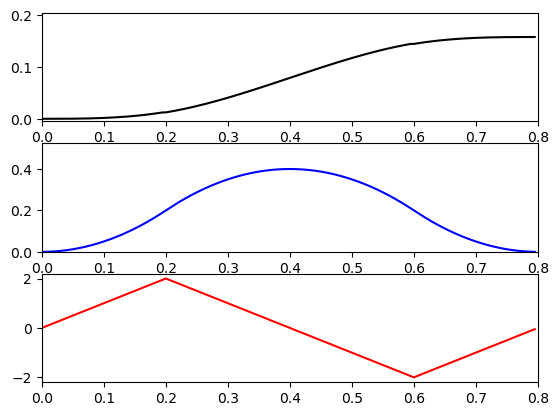

In [39]:
time = []
p = []
v = []
a = []

#case 2
t_p = a_max/j_max
T = 4*t_p

fig, axs = plt.subplots(3)
writer = PillowWriter(fps = 25)
axs[0].set_xlim(0,T)
axs[0].set_ylim(-.005,d+.005)
axs[1].set_xlim(0,T)
axs[1].set_ylim(0,v_max+.025)
axs[2].set_xlim(0,T)
axs[2].set_ylim(-a_max-.2,a_max+.2)
#case 2
while(t < T):
    time.append(t)
    if(t <= t_p):
        v.append(j_max*t**2/2)
        a.append(j_max*t)
        p.append(j_max*t**3/6)
        p_1 = p[-1]
    elif(t <= 3*t_p):
        v.append(j_max*t_p**2 - j_max/2*(t-2*t_p)**2)
        a.append(-j_max*(t-2*t_p))
        p.append(j_max*t_p**2*(t - t_p) - j_max/6*(t-2*t_p)**3 + j_max/6*(t_p-2*t_p)**3 + p_1)
        p_2 = p[-1]
    elif(t <= 4*t_p):
        #p_5 = p_1 + j_max*t_p**2*2*t_p - j_max/6*(3*t_p-2*t_p)**3 + j_max/6*(t_p-2*t_p)**3
        v.append(j_max*(t - 4*t_p)**2/2)
        a.append(j_max*(t-4*t_p))
        p.append(j_max*(t - 4*t_p)**3/6 - j_max*(-t_p)**3/6 + p_2)
    t += interval
d_c1 = p[-1]


axs[0].plot(time,p,'-k')
axs[1].plot(time,v,'-b')
axs[2].plot(time,a,'-r')

#case 2
'''
t_accel = a_max/j_max
v_1 = a_max*t/2
v_2 = dv_accel
v_3
v_4
v_5
v_6
v_7
'''

In [40]:
'''
time = []
p = []
v = []
a = []

#case 1
t_p = (d/(2*j_max))**(1/3)
T = 4*t_p


fig, axs = plt.subplots(3)
writer = PillowWriter(fps = 25)
axs[0].set_xlim(0,T)
axs[0].set_ylim(-.005,d+.005)
axs[1].set_xlim(0,T)
axs[1].set_ylim(0,v_max+.025)
axs[2].set_xlim(0,T)
axs[2].set_ylim(-a_max-.2,a_max+.2)
with writer.saving(fig,'scurve2.gif',100):
    #case 1
    while(t < T):
        time.append(t)
        if(t <= t_p):
            v.append(j_max*t**2/2)
            a.append(j_max*t)
            p.append(j_max*t**3/6)
        elif(t <= 2*t_p):
            v.append(j_max*t_p**2 - j_max/2*(t-2*t_p)**2)
            a.append(-j_max*(t-2*t_p))
            p.append(p[int(t_p/interval)] + j_max*t_p**2*(t - t_p) - j_max/6*(t-2*t_p)**3 + j_max/6*(t_p-2*t_p)**3)
        elif(t <= 3*t_p):
            v.append(j_max*t_p**2 - j_max/2*(t-2*t_p)**2)
            a.append(-j_max*(t-2*t_p))
            p.append(p[int(t_p/interval)] + j_max*t_p**2*(t - t_p) - j_max/6*(t-2*t_p)**3 + j_max/6*(t_p-2*t_p)**3)   
        elif(t <= 4*t_p):
            #p_5 = p_1 + j_max*t_p**2*2*t_p - j_max/6*(3*t_p-2*t_p)**3 + j_max/6*(t_p-2*t_p)**3
            v.append(j_max*(t - 4*t_p)**2/2)
            a.append(j_max*(t-4*t_p))
            p.append(j_max*(t - 4*t_p)**3/6 - j_max*(-t_p)**3/6)
        t += interval
        axs[0].plot(time,p,'-k')
        axs[1].plot(time,v,'-b')
        axs[2].plot(time,a,'-r')
        writer.grab_frame()
'''

'''
#case 2
t_accel = a_max/j_max
v_1 = a_max*t/2
v_2 = dv_accel
v_3
v_4
v_5
v_6
v_7
'''

'\n#case 2\nt_accel = a_max/j_max\nv_1 = a_max*t/2\nv_2 = dv_accel\nv_3\nv_4\nv_5\nv_6\nv_7\n'

<img src="scurve2.gif" width="400" align="left">

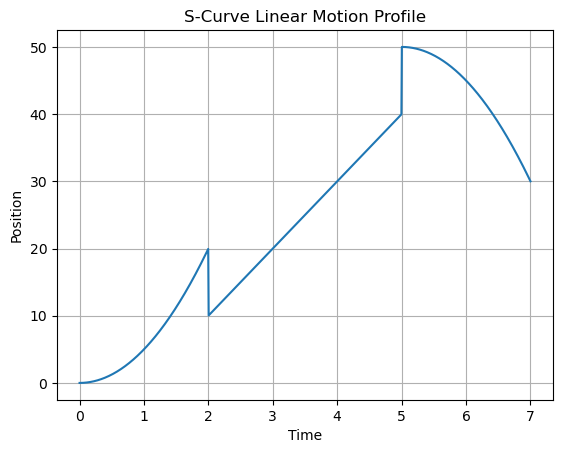

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def generate_s_curve_profile(max_jerk, max_acceleration, max_velocity, distance):
    # Calculate time for acceleration phase
    accel_time = max_velocity / max_acceleration
    accel_distance = 0.5 * max_acceleration * accel_time ** 2

    # Check if distance is too short for full profile
    if distance <= 2 * accel_distance:
        raise ValueError("Distance is too short for full profile")

    # Calculate the time for constant velocity phase
    const_velocity_distance = distance - 2 * accel_distance
    const_velocity_time = const_velocity_distance / max_velocity

    # Calculate total time
    total_time = 2 * accel_time + const_velocity_time

    # Generate time array
    t = np.linspace(0, total_time, 1000)

    # Generate motion profile
    motion_profile = np.zeros_like(t)
    for i, time in enumerate(t):
        if time < accel_time:
            # Acceleration phase
            motion_profile[i] = 0.5 * max_jerk * time ** 2
        elif time < total_time - accel_time:
            # Constant velocity phase
            motion_profile[i] = max_velocity * (time - accel_time) + accel_distance
        else:
            # Deceleration phase
            time_from_start_of_decel = time - (total_time - accel_time)
            motion_profile[i] = distance - 0.5 * max_jerk * time_from_start_of_decel ** 2

    return t, motion_profile

# Example parameters
max_jerk = 10
max_acceleration = 5
max_velocity = 10
distance = 50

# Generate motion profile
t, motion_profile = generate_s_curve_profile(max_jerk, max_acceleration, max_velocity, distance)

# Plot the motion profile
plt.plot(t, motion_profile)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('S-Curve Linear Motion Profile')
plt.grid(True)
plt.show()
